# This script contains the following:
### 1. Importing Visualization Libraries and Data
### 2. Exploring Relationships
 #### Correlations
 #### Scatterplots
 #### Pair Plots
 #### Categorical Plots

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
##Python shortcut to folder path##
path = r'C:\Users\hazem\Master Folder- Airbnb Prices in European Cities'

In [5]:
## Importing Data Set ##
df_Airbnb = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'AirBnb_Europe_Clean.csv'), index_col = False)

In [6]:
## Dropping (Unnamed:0) column ## 
df_airbnb = df_Airbnb.drop(columns = ['Unnamed: 0'])

## 2. Exploring Relationships

### Correlations 

In [7]:
# Create a correlation matrix using pandas

df_airbnb.corr()

,accommodation,person_capacity,cleanliness_rating,guest_rating,bedrooms,city_distance,metro_distance,longitude,latitude
accommodation,1.000000,0.203003,-0.005946,-0.001795,0.221768,-0.045001,-0.061396,-0.173786,0.211599
person_capacity,0.203003,1.000000,0.003484,0.005341,0.560503,-0.128709,-0.037689,0.147006,-0.168383
cleanliness_rating,-0.005946,0.003484,1.000000,0.713924,0.034120,-0.029628,0.010845,0.120054,-0.092209
guest_rating,-0.001795,0.005341,0.713924,1.000000,0.048278,-0.003663,0.030447,0.155653,-0.033593
bedrooms,0.221768,0.560503,0.034120,0.048278,1.000000,-0.006693,0.043781,0.014294,-0.104803
city_distance,-0.045001,-0.128709,-0.029628,-0.003663,-0.006693,1.000000,0.557936,-0.147394,0.405644
metro_distance,-0.061396,-0.037689,0.010845,0.030447,0.043781,0.557936,1.000000,-0.069919,0.086355
longitude,-0.173786,0.147006,0.120054,0.155653,0.014294,-0.147394,-0.069919,1.000000,-0.159181
latitude,0.211599,-0.168383,-0.092209,-0.033593,-0.104803,0.405644,0.086355,-0.159181,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

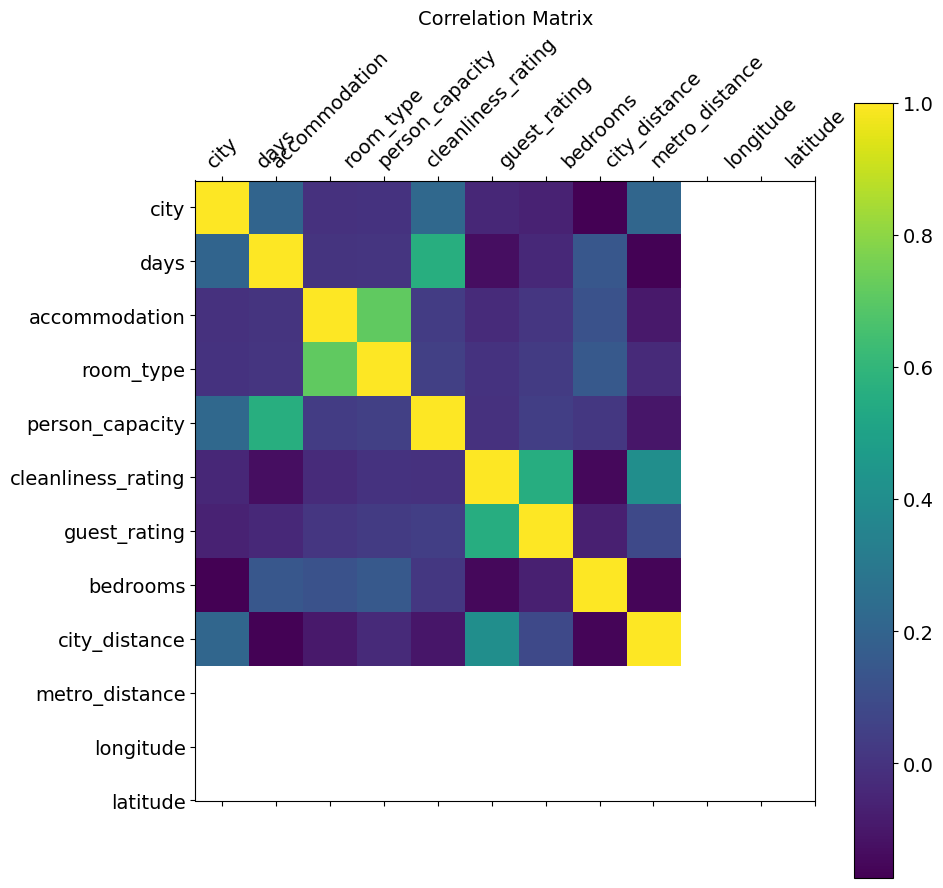

In [8]:
f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_airbnb.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_airbnb.shape[1]), df_airbnb.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_airbnb.shape[1]), df_airbnb.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

We can see that there is a possible positive correlations between some variables, 
in order to be more clear. we are gonna try the Seaborn correlation heat map next

### Create a correlation heatmap using seaborn

In [9]:
df_airbnb.columns

Index(['city', 'days', 'accommodation', 'room_type', 'person_capacity',
       'cleanliness_rating', 'guest_rating', 'bedrooms', 'city_distance',
       'metro_distance', 'longitude', 'latitude'],
      dtype='object')

In [10]:
## First, we need to create a subset with variables that can show some results ##

sub = df_airbnb[['accommodation', 'person_capacity',
       'cleanliness_rating', 'guest_rating', 'bedrooms', 'city_distance',
       'metro_distance']]

## Q. Does the distance from the City Centre/Metro affect the accommodation rate?

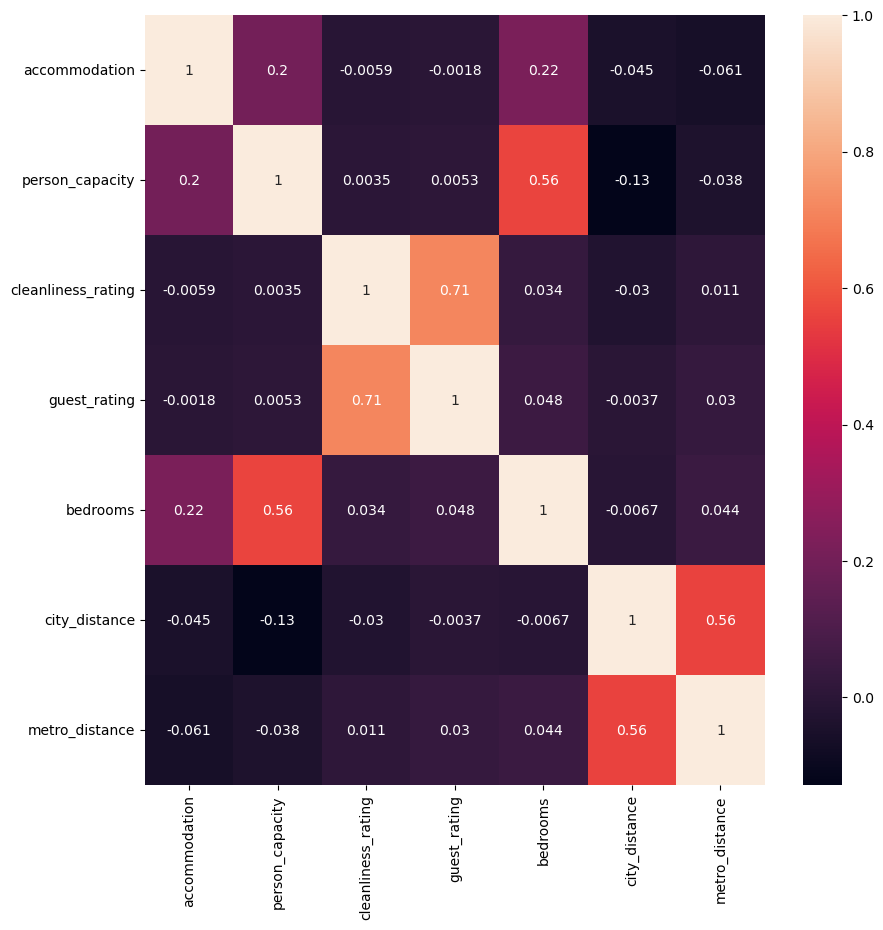

In [11]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

The correlation heat-map gave us an absolute negative correlation to our Q as there is no correlation between City/Metro distance and accomodation rate, but on the other hand we found a strong positive correlation 0.7 between (guest_rating) & (Cleanliness_rating)

### Scatterplots:

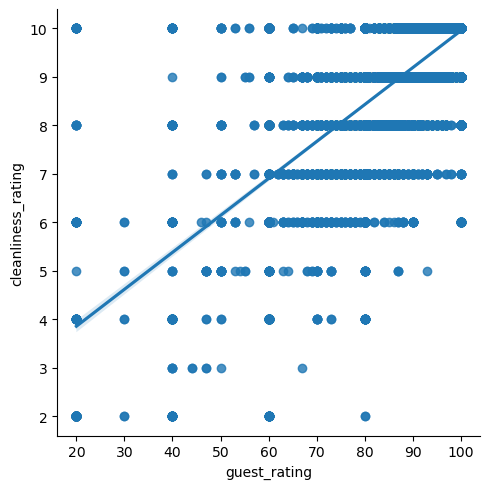

In [12]:
# Create a scatterplot for the "cleanliness_rating" and "guest_rating" columns in seaborn

sns.lmplot(x = 'guest_rating', y = 'cleanliness_rating', data = df_airbnb)

##### The Scatterplot proves the positive correlation between guest rating & cleanliness_rating as the more the room/apt got a good rate for cleanliness it raises the general guest rates.

### Pair plot:

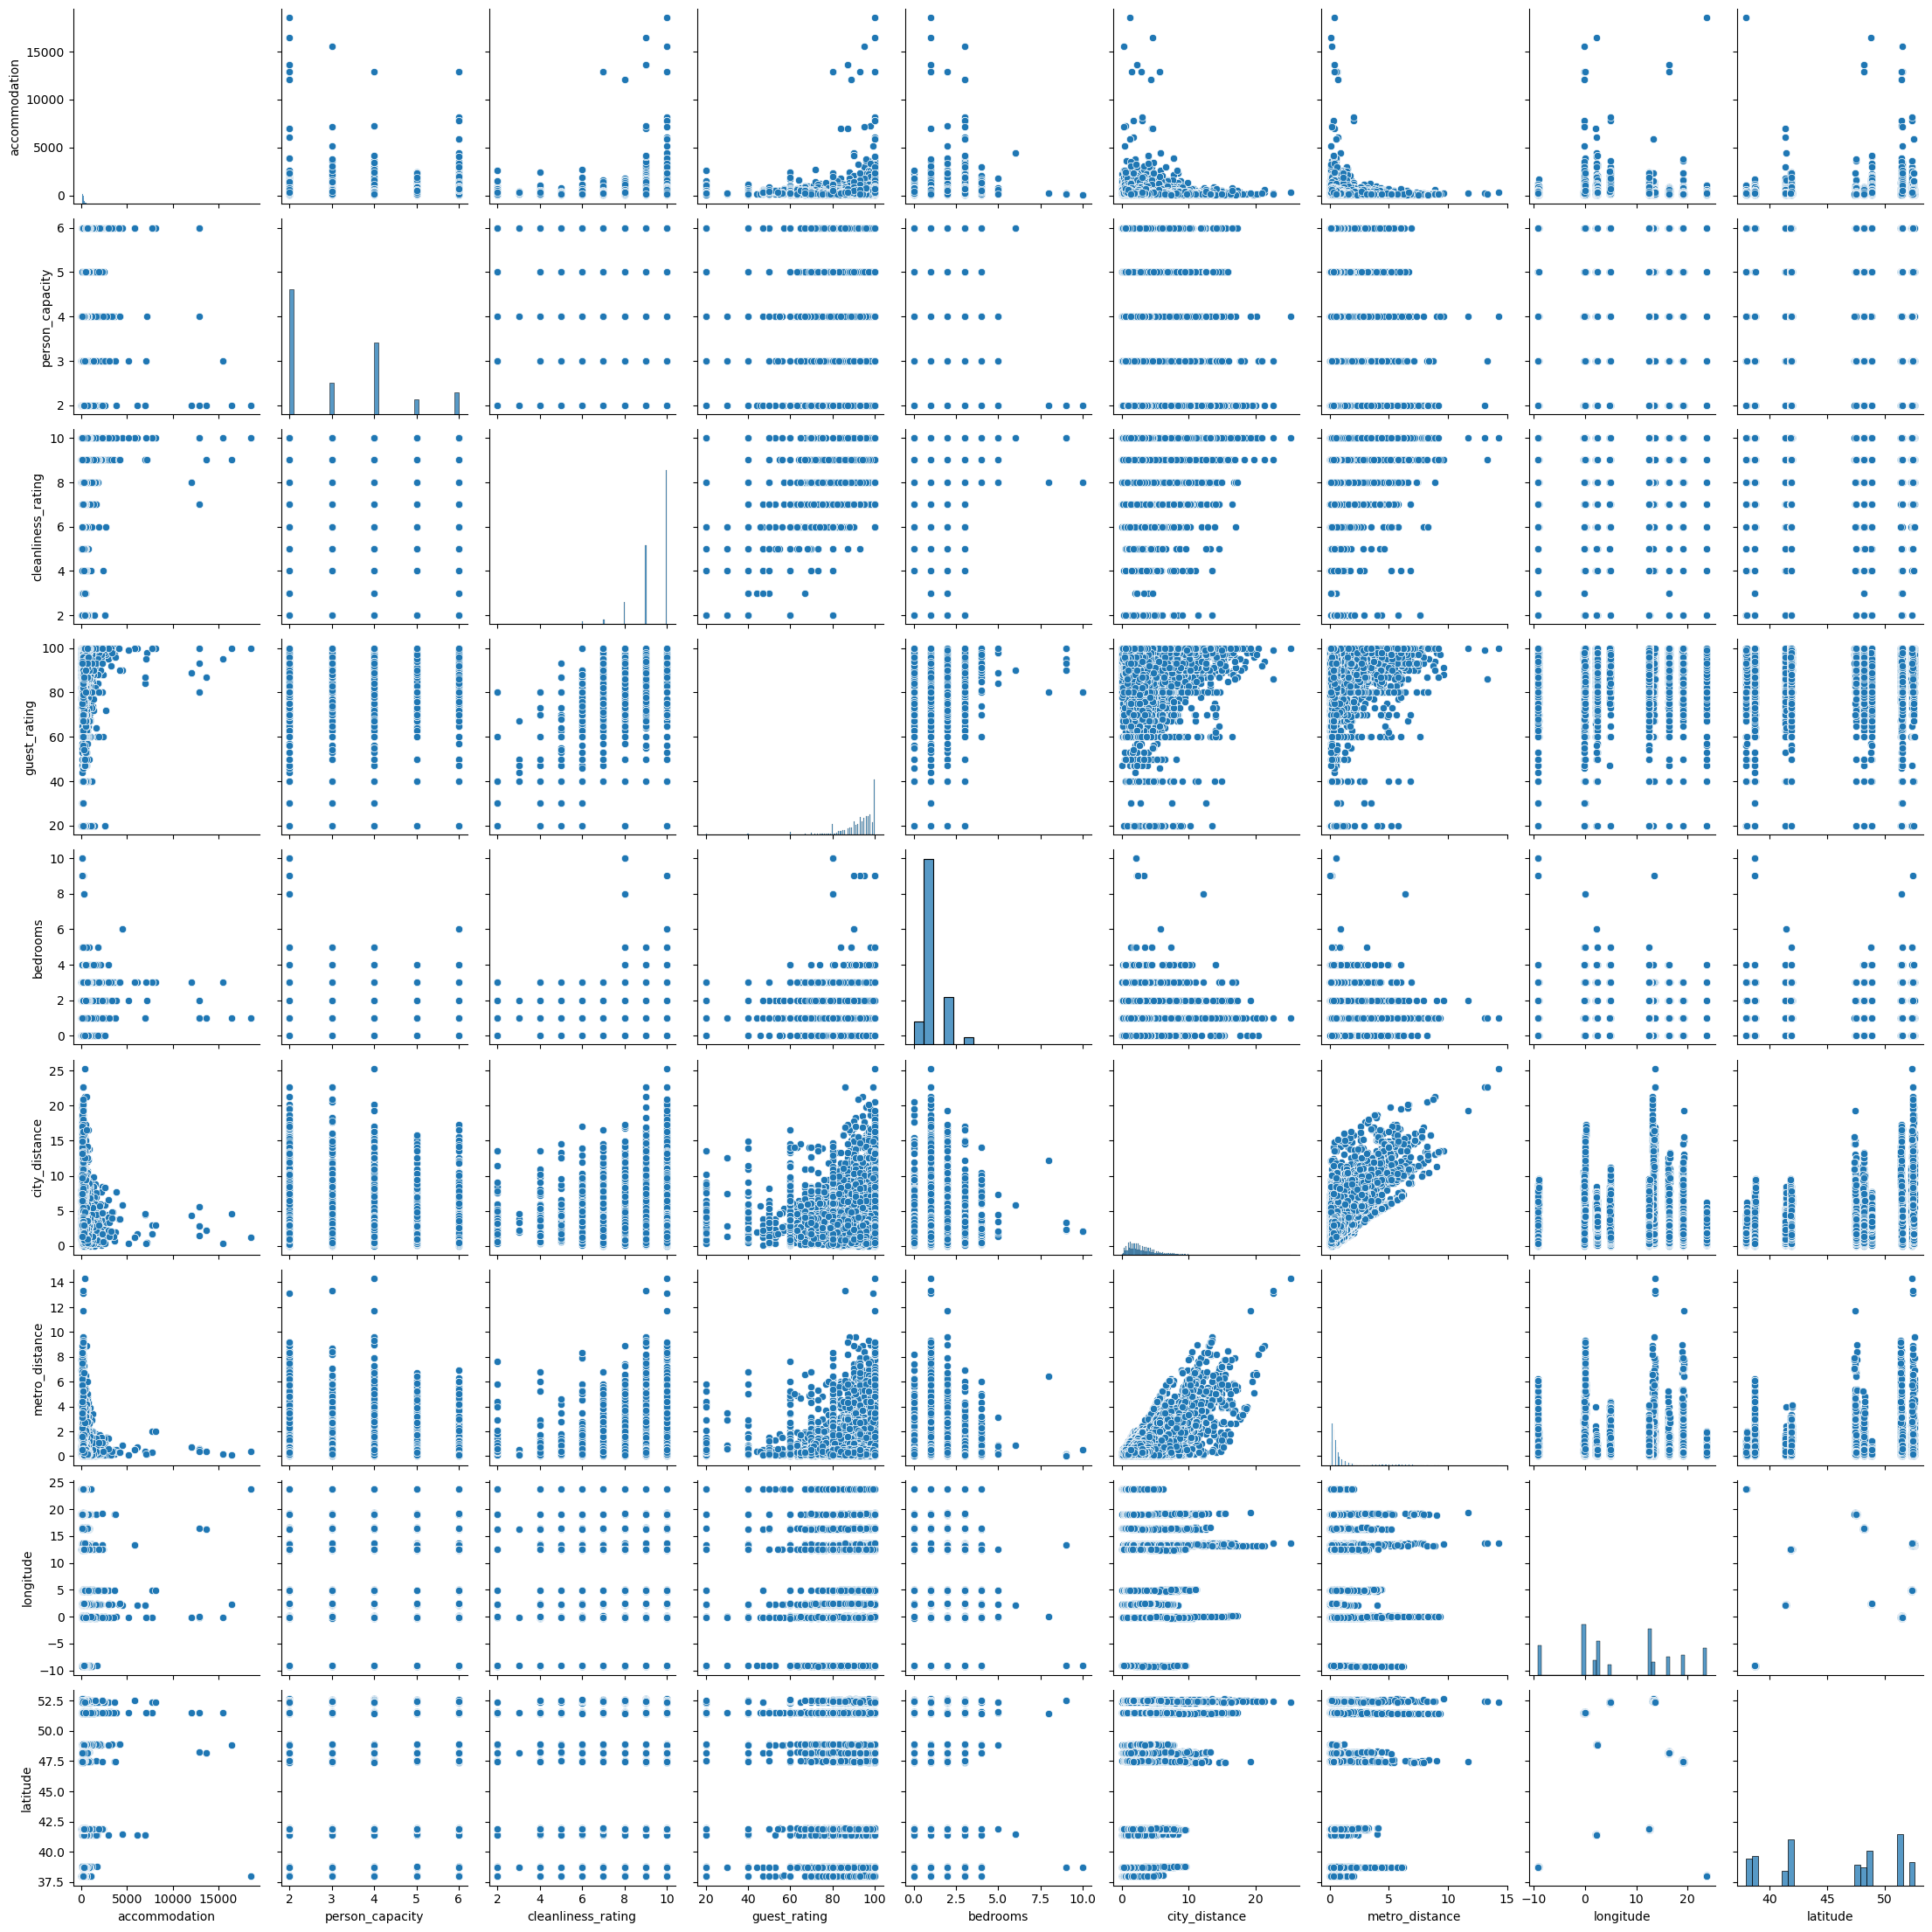

In [13]:
## Creating pair plot to the entire dataset ##

g = sns.pairplot(df_airbnb)

There is some interest correlation needs more analysis in the above pair plot. for instance,
metro/city_distance & guest_rating, 
slight correlation between metro/city_distance & accommodation 
also, accommodation & guest_rating

### Categorical Plots:

<AxesSubplot:xlabel='guest_rating', ylabel='Count'>

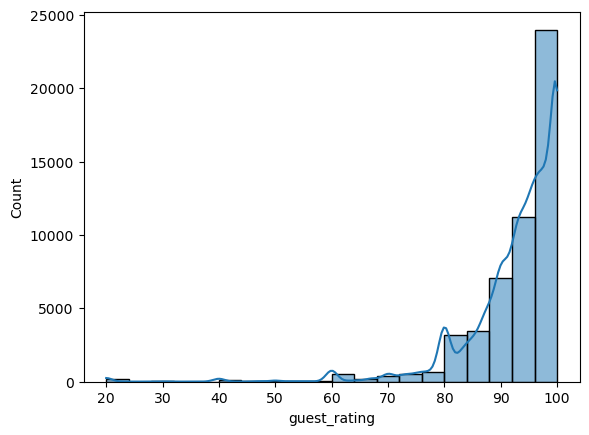

In [14]:
## Creating categorical variable that split 'Accommodation' column into 3 categories ##
sns.histplot(df_airbnb['guest_rating'], bins = 20, kde = True)

In [15]:
df_airbnb.loc[df_airbnb['guest_rating'] < 80, 'Rating category'] = 'Low rate'

In [16]:
df_airbnb.loc[(df_airbnb['guest_rating'] >= 80) & (df_airbnb['guest_rating'] < 90), 'Rating category'] = 'Middle rate'

In [17]:
df_airbnb.loc[df_airbnb['guest_rating'] >= 90, 'Rating category'] = 'High rate'

In [18]:
df_airbnb['Rating category'].value_counts(dropna = False)

High rate      39655
Middle rate     9351
Low rate        2605
Name: Rating category, dtype: int64

In [19]:
df_airbnb.columns

Index(['city', 'days', 'accommodation', 'room_type', 'person_capacity',
       'cleanliness_rating', 'guest_rating', 'bedrooms', 'city_distance',
       'metro_distance', 'longitude', 'latitude', 'Rating category'],
      dtype='object')

In [20]:
df_airbnb.shape

(51611, 13)

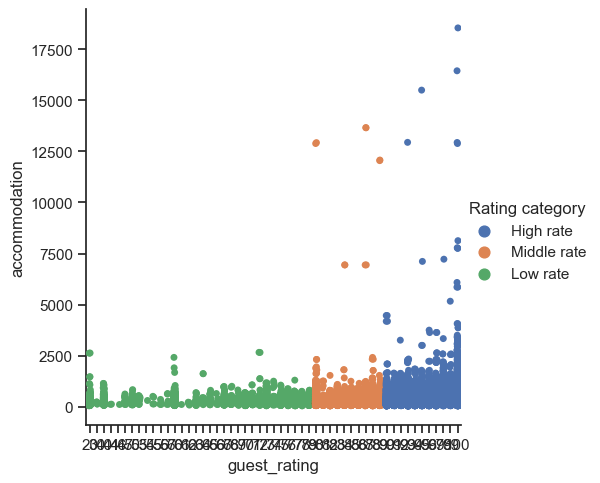

In [23]:
# Create a categorical plot in seaborn using the Rating categories created above

sns.set(style="ticks")
g = sns.catplot(x="guest_rating", y="accommodation", hue="Rating category", data=df_airbnb)

In [24]:
# fig = g.get_figure()
g.savefig("out.png") 

In [25]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\hazem\\Master Folder- Airbnb Prices in European Cities\\Scripts'

### Questions conducted from Pair Plot:
##### 1) How metro/city_distance affects on guest_rating?
##### 2) Do metro/city_distance affects rooms/apts rates (accommodation)?
##### 3) Does high accommodation has an impact on guest_rating ?

### Hypotheses
###### As the City Centre/Metro distance increases, The guest rating decreases
###### As the City Centre/Metro distance decreases , There are higher accommodations 


In [26]:
df_airbnb.to_csv(os.path.join(path, '02 Data', 'Original Data', 'Airbnb_Europe_Clean.csv'))